

# Telco Customer Churn

----

## Aim: To predict the behaviour of customers on whether or not they will churn based on the previous data collected from Telco
---


## First the data is read in, the link to the data set is given below:
## https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data Analysis and General Feature Exploration

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Count plot of the whether or not a customer churned**

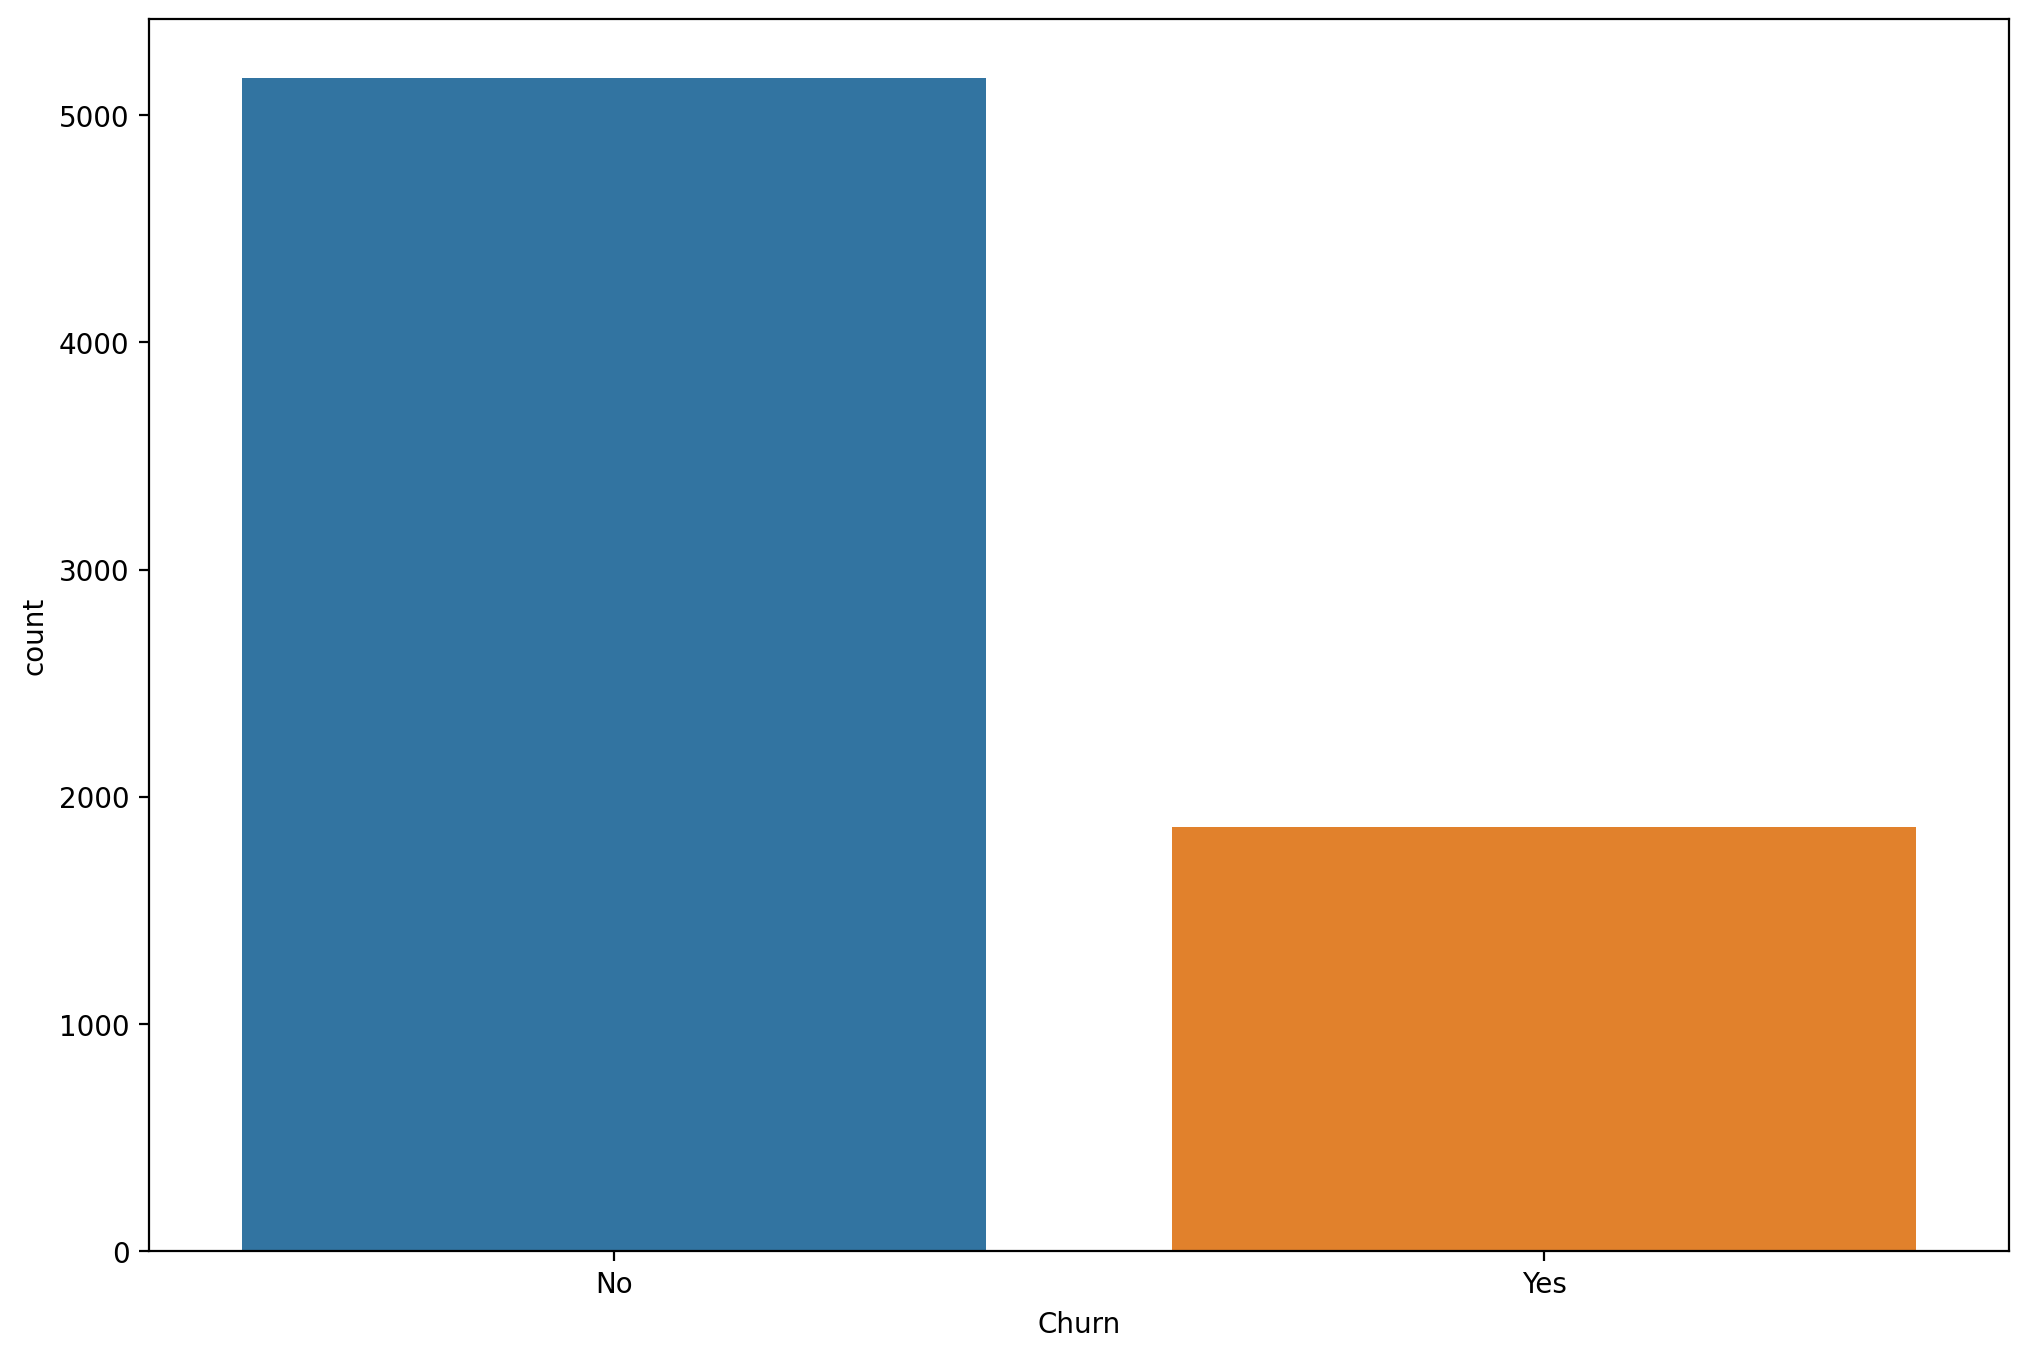

In [21]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df,x="Churn");

**Violen Plot of the distrbution of TotalCharges between Churn categories**

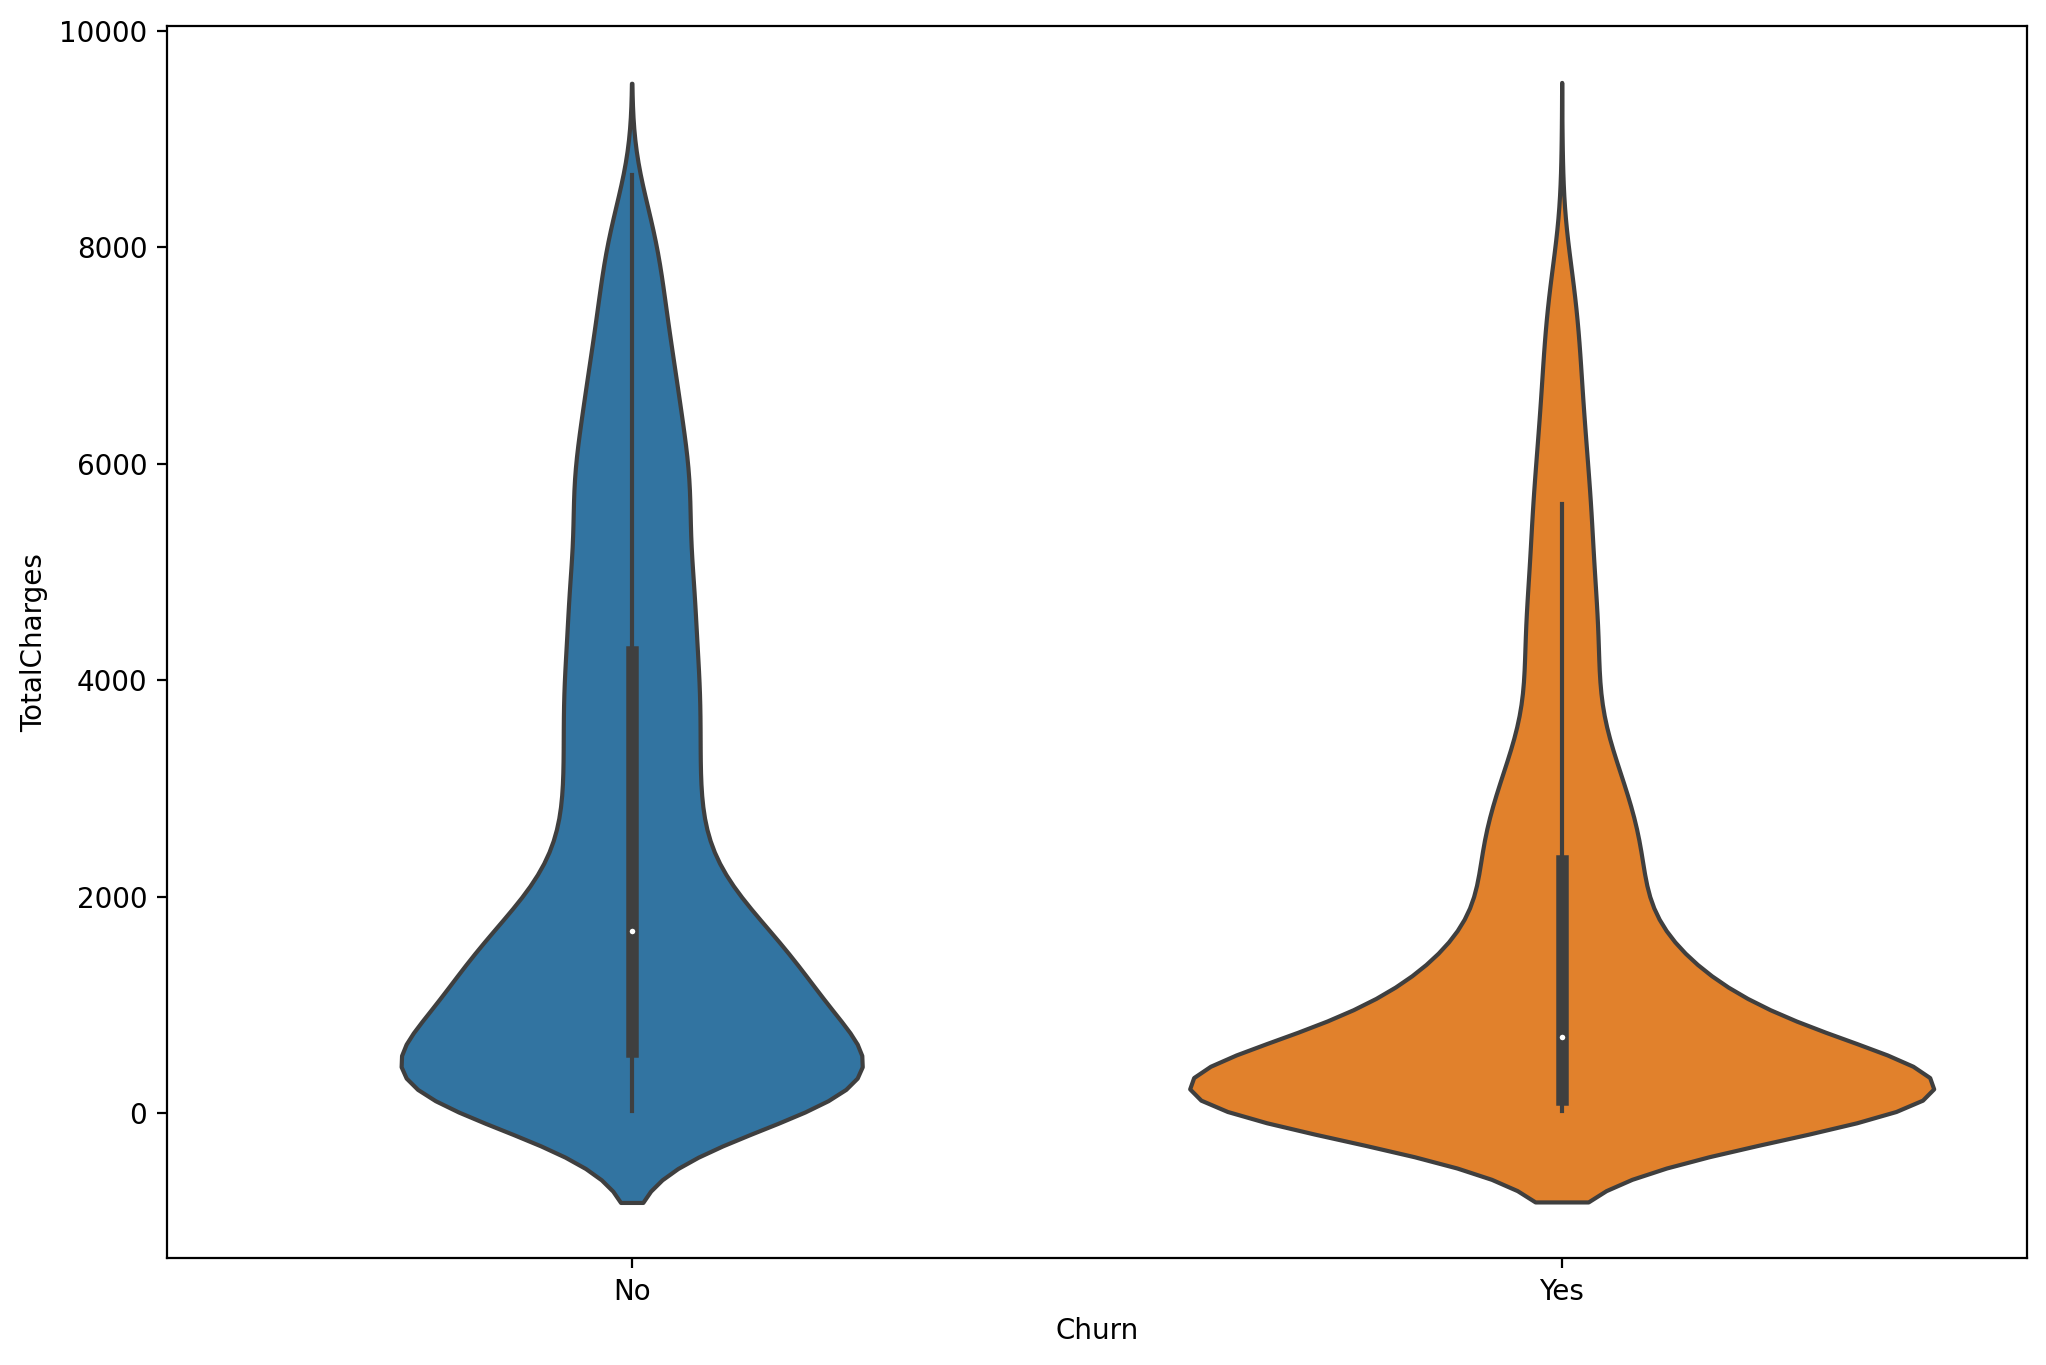

In [20]:
plt.figure(figsize=(12,8), dpi=200)
sns.violinplot(data=df, x ="Churn", y = "TotalCharges");

**Boxplot showing the distribution of TotalCharges per Contract type, hue coloring based on the Churn class**

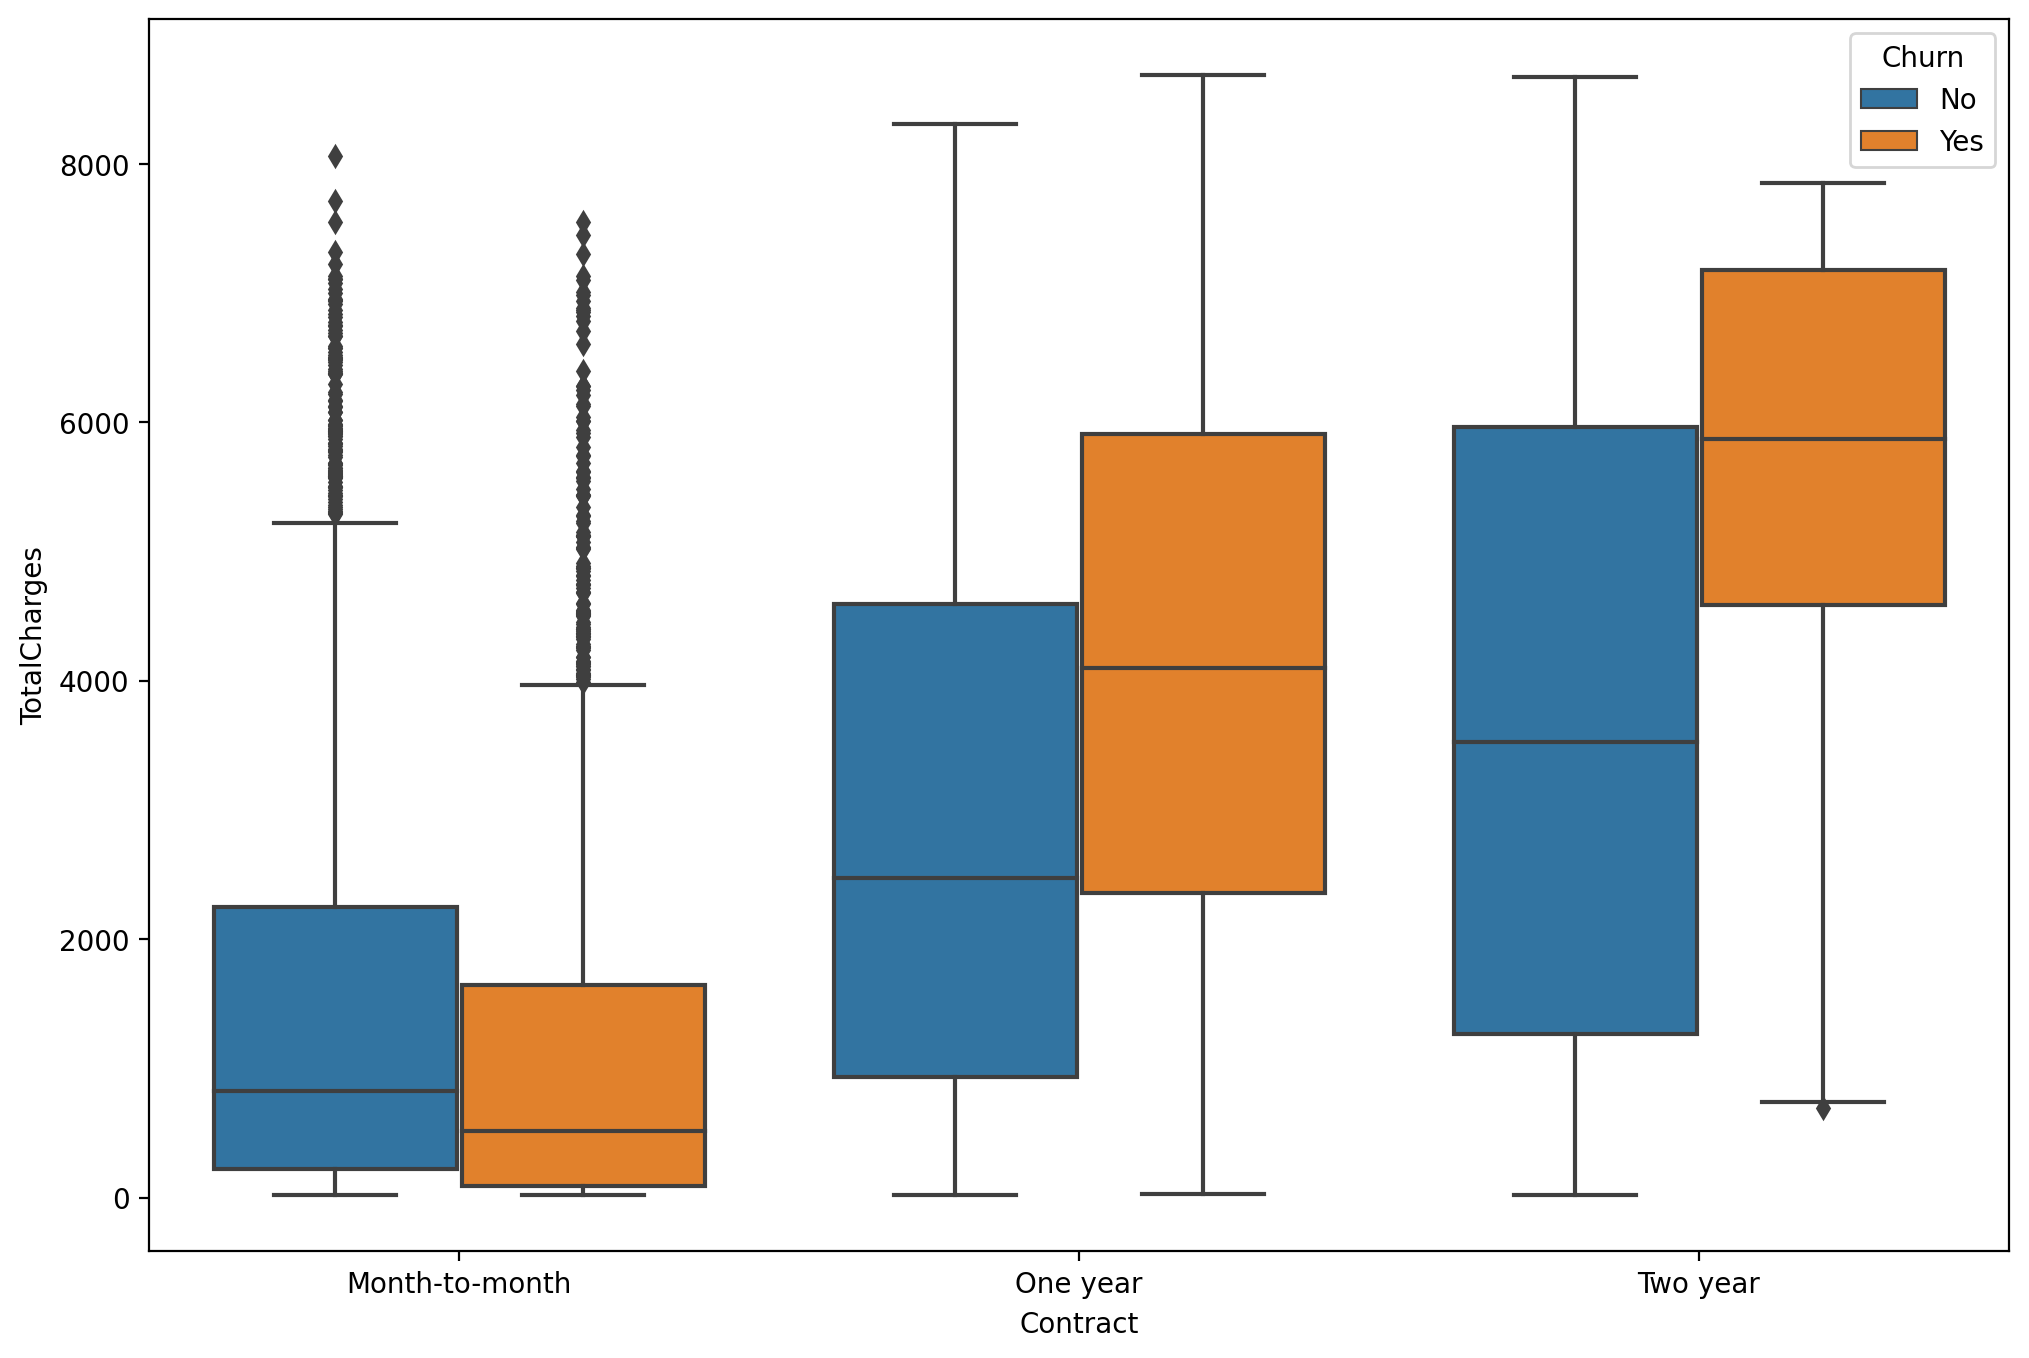

In [26]:
plt.figure(figsize=(12,8), dpi=200)
sns.boxplot(data = df, x ="Contract", y="TotalCharges", hue = "Churn" );

**Bar plot showing the correlation of the following features**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
df_corr = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [53]:
df_corr['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

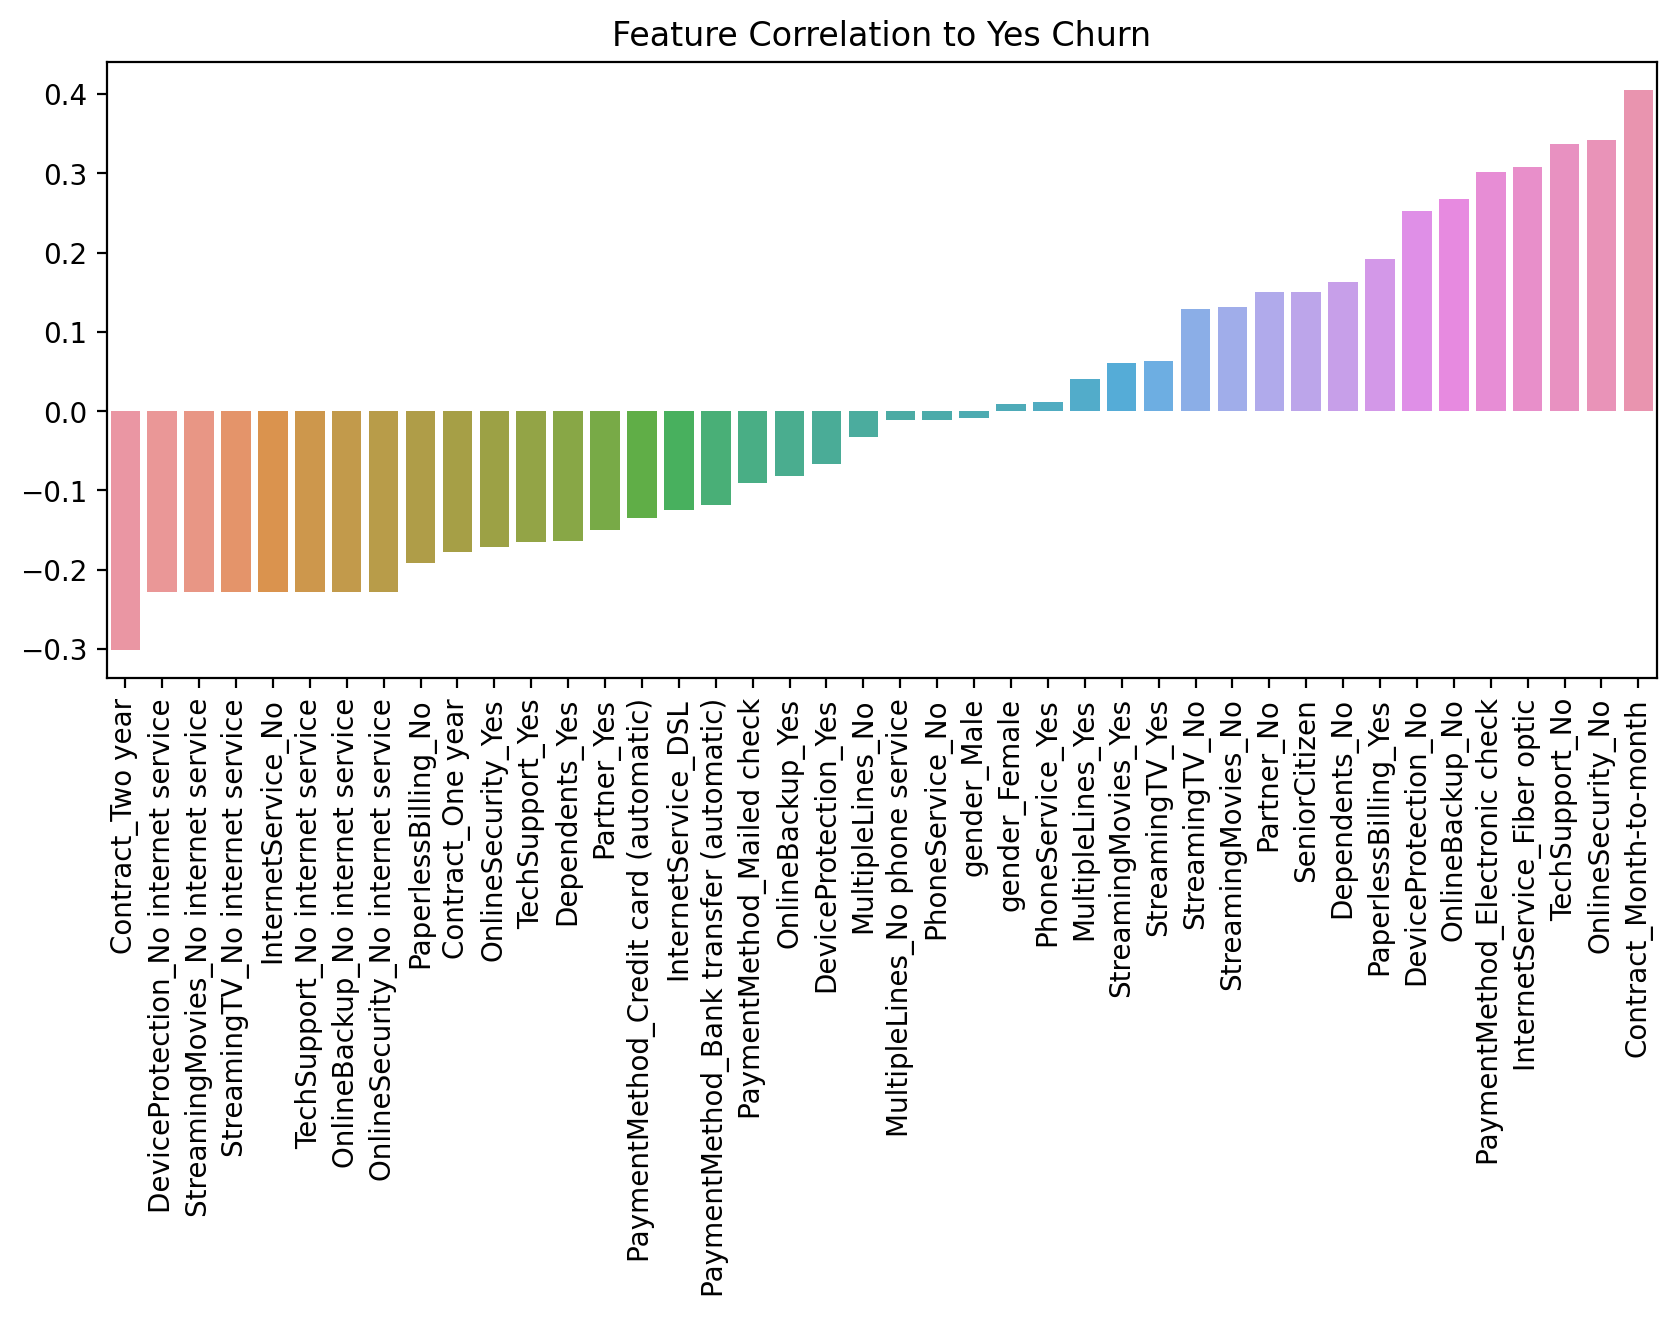

In [57]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=df_corr['Churn_Yes'].sort_values().iloc[1:-1].index,y=df_corr['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

## Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", and examining differences between customer cohort segments**

**The 3 contract types available:**

In [62]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Histogram displaying the distribution of 'tenure' column**

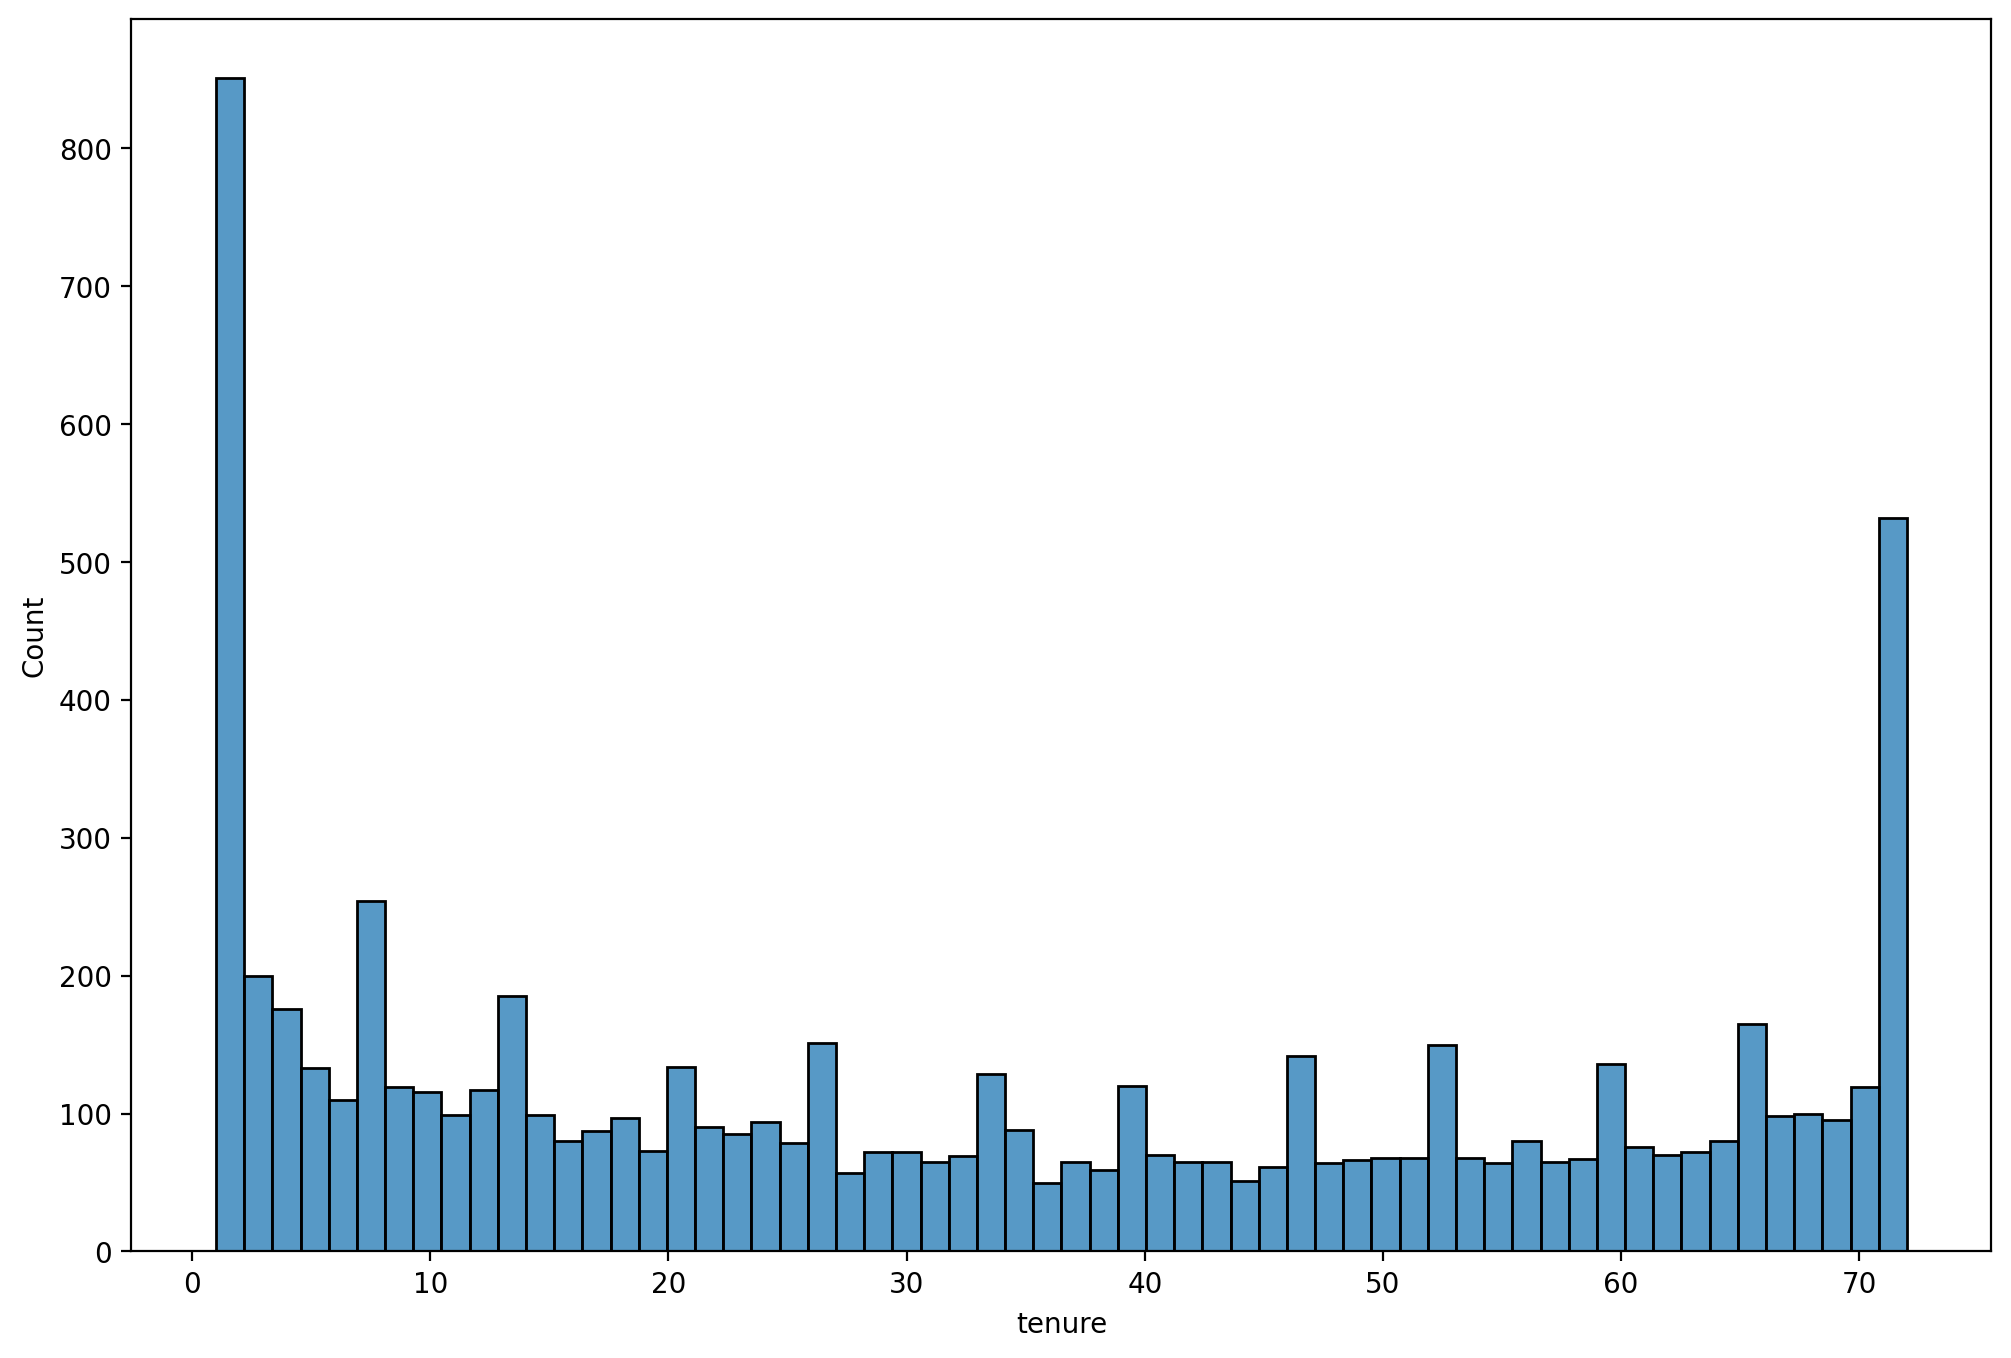

In [97]:
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(data=df,x="tenure",bins=60);

**Histograms seperated by churn and contract**

<Figure size 2000x600 with 0 Axes>

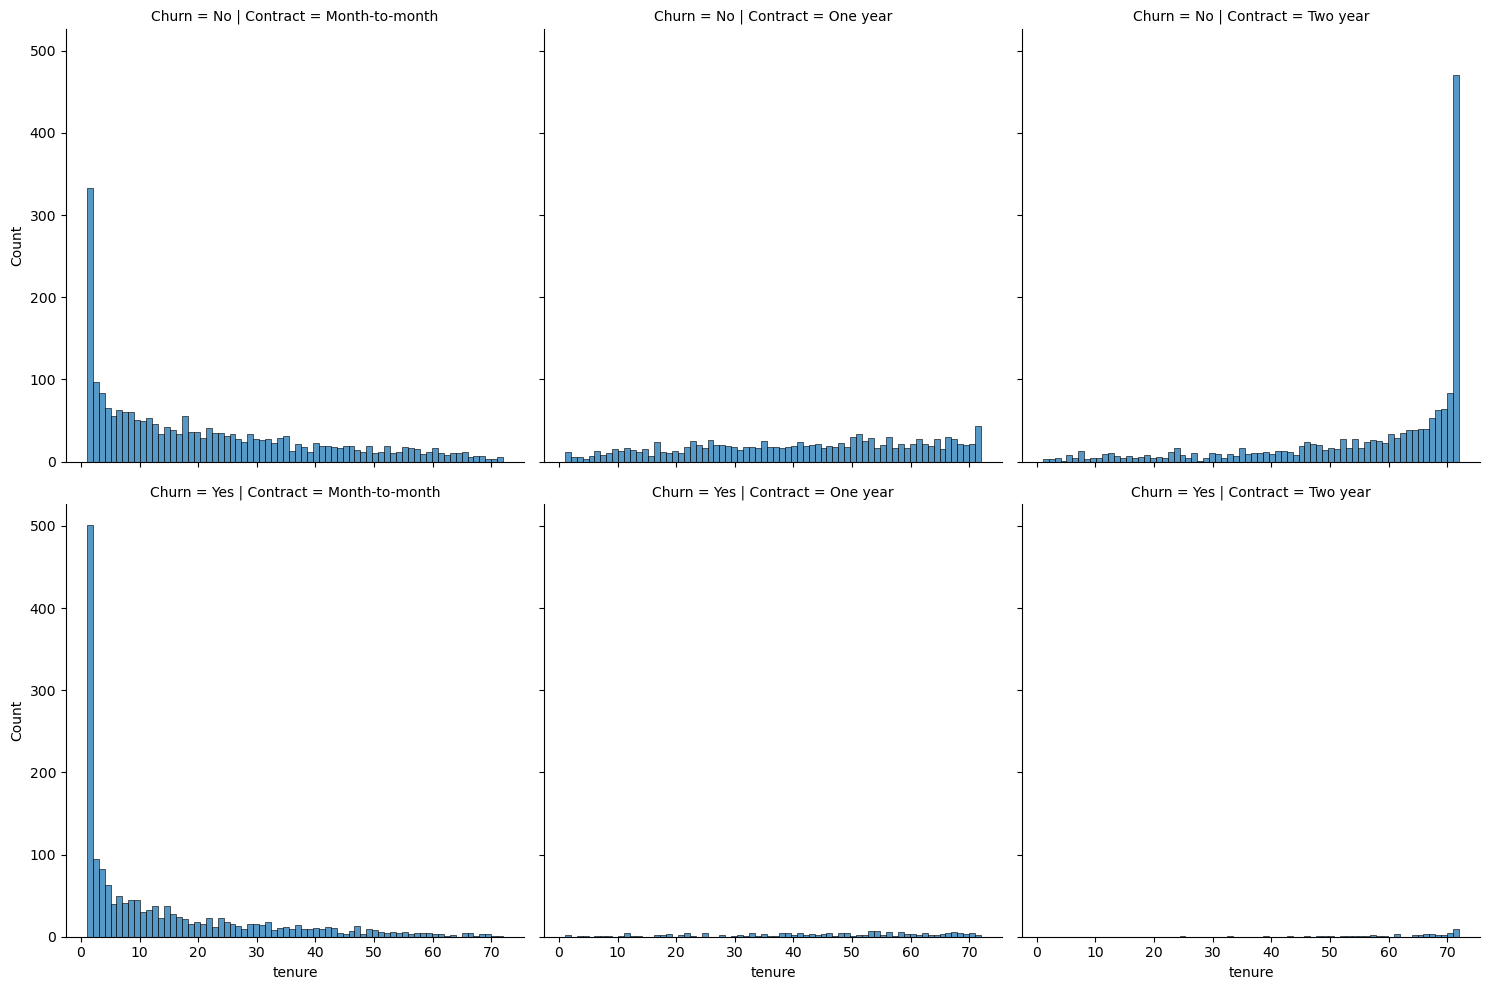

In [72]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**Scatter plot of Total Charges versus Monthly Charges, hue by Churn**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

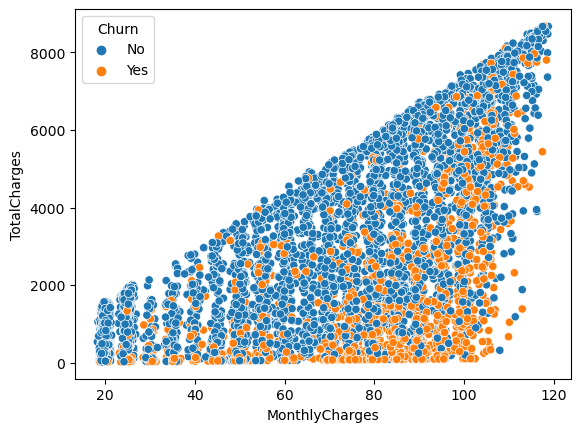

In [73]:
sns.scatterplot(data=df,x="MonthlyCharges", y= "TotalCharges" , hue="Churn")

## Cohorts based on Tenure

**We treat each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, we calculate the Churn rate per cohort.**

In [74]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Plot showing churn rate per months of tenure.**

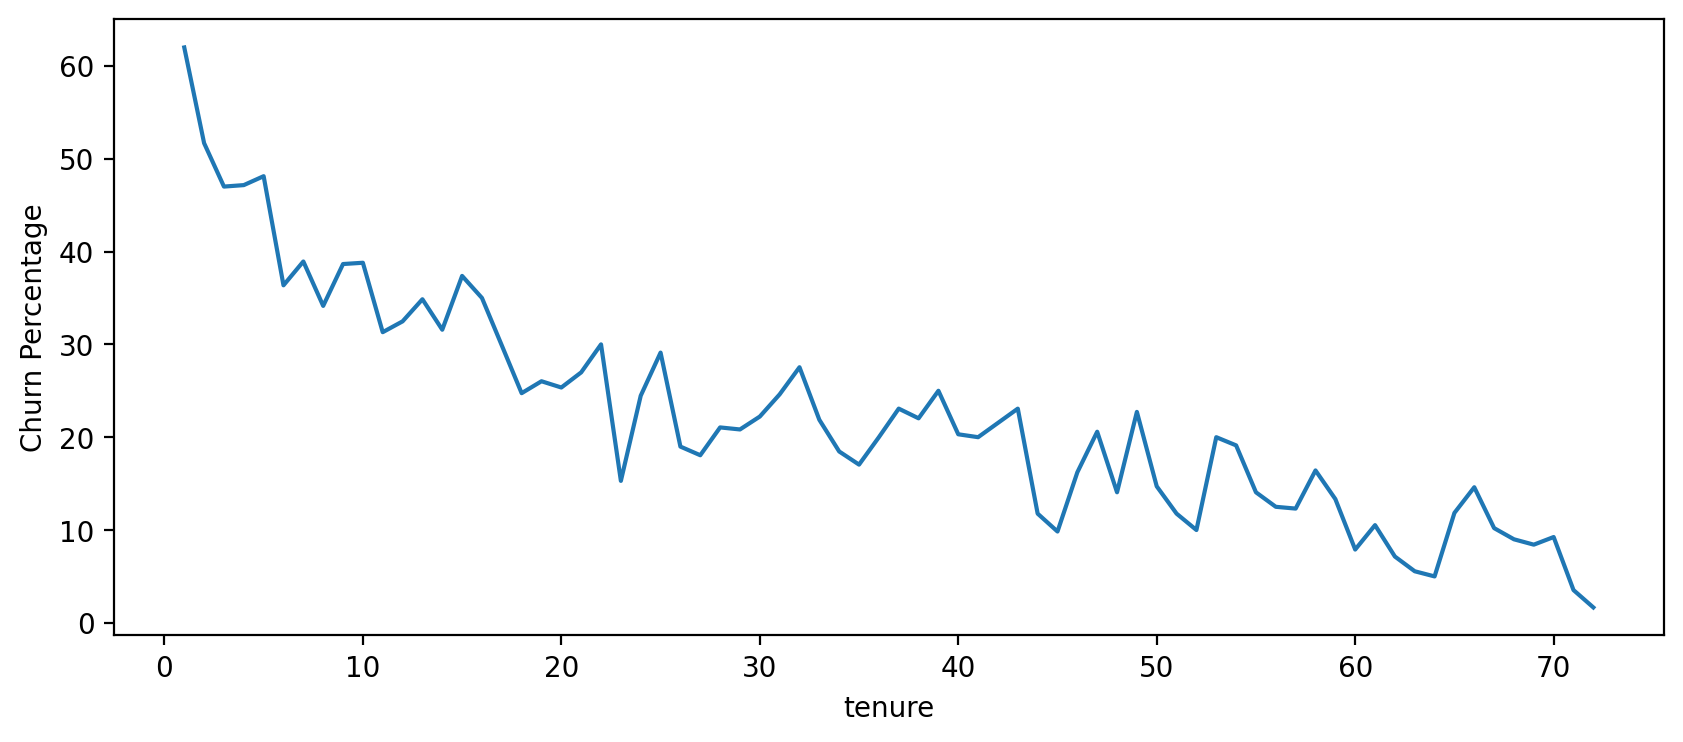

In [75]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Broader Cohort Groups
**We create a new Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [76]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [77]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**Scatterplot of Total Charges versus Monthly Charts, colored by Tenure Cohort**

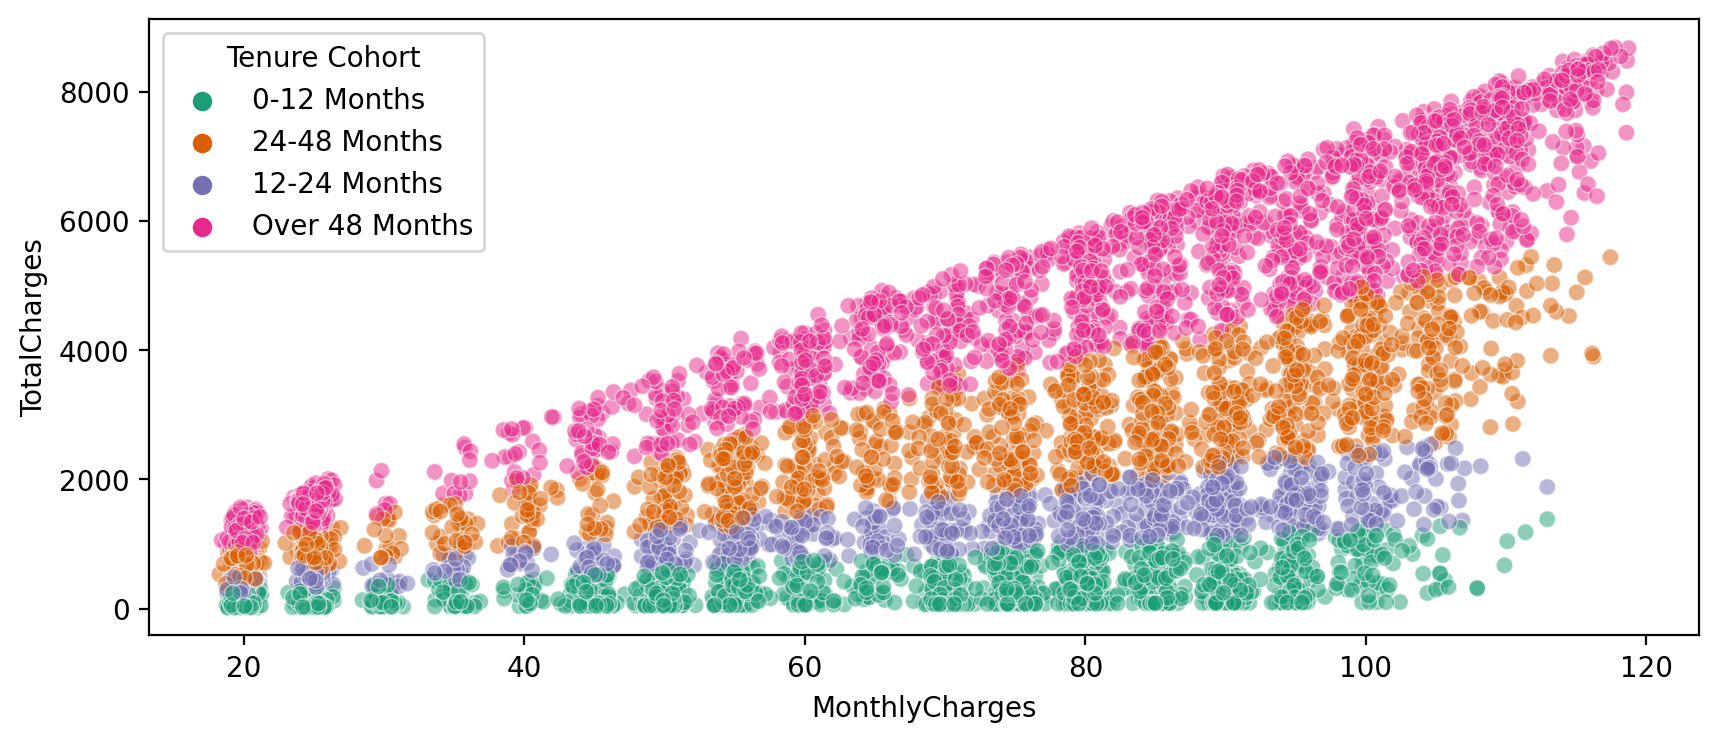

In [79]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2');

**Count plot showing the churn count per cohort**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

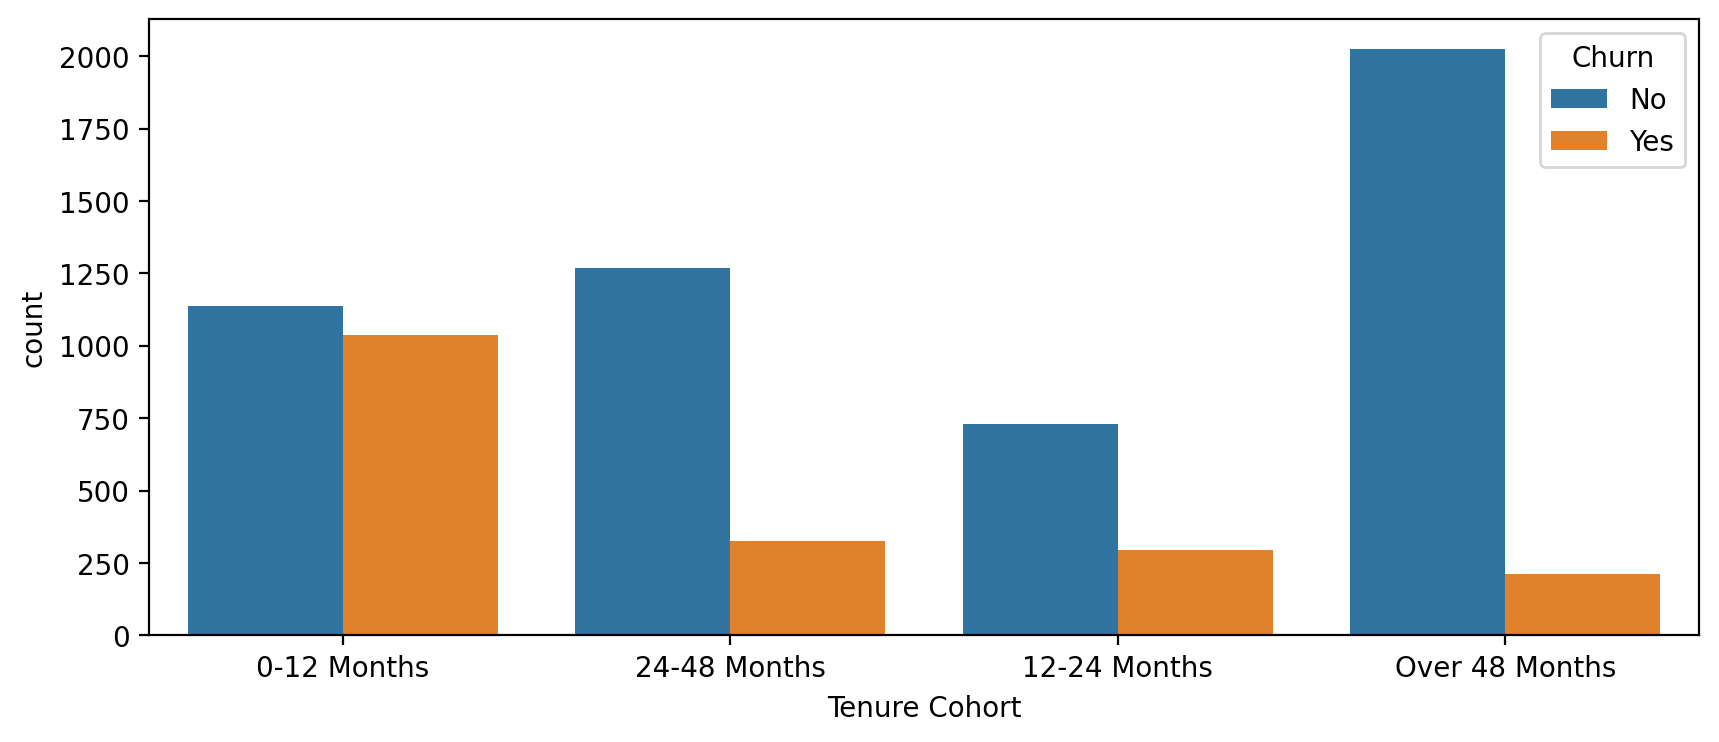

In [80]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

**Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue**

<Figure size 2000x800 with 0 Axes>

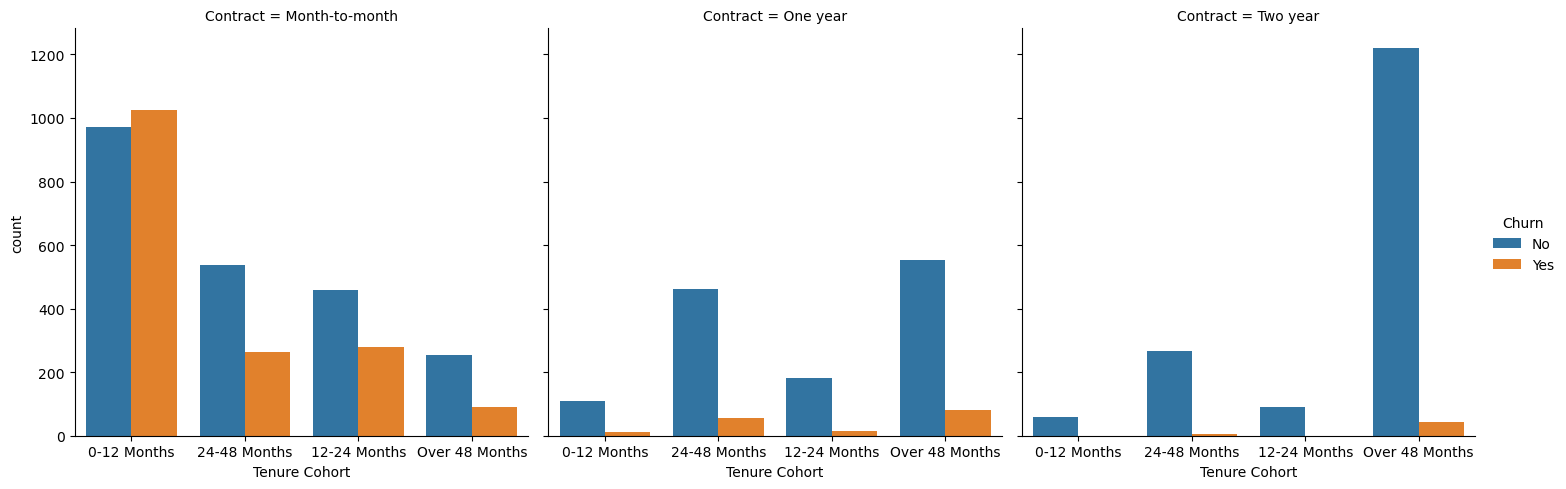

In [100]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count');

-----

# Predictive Modeling

**Here we explore 3 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost**


## Single Decision Tree

**Separating out the data into X features and Y label. We create dummy variables wherever necesarry**

In [82]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

**Performing a train test split, holding out 10% of the data for testing**

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Decision Tree Perfomance. Here we:**
   1. Train a single decision tree model.
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. Plot the tree.

In [102]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [87]:
preds = dt.predict(X_test)
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



C:\Users\nitin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


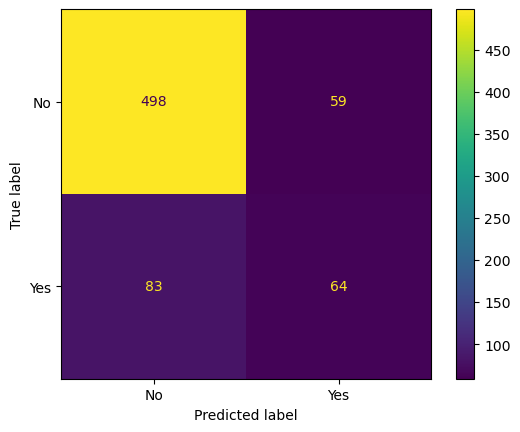

In [104]:
plot_confusion_matrix(dt,X_test,y_test)

In [91]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

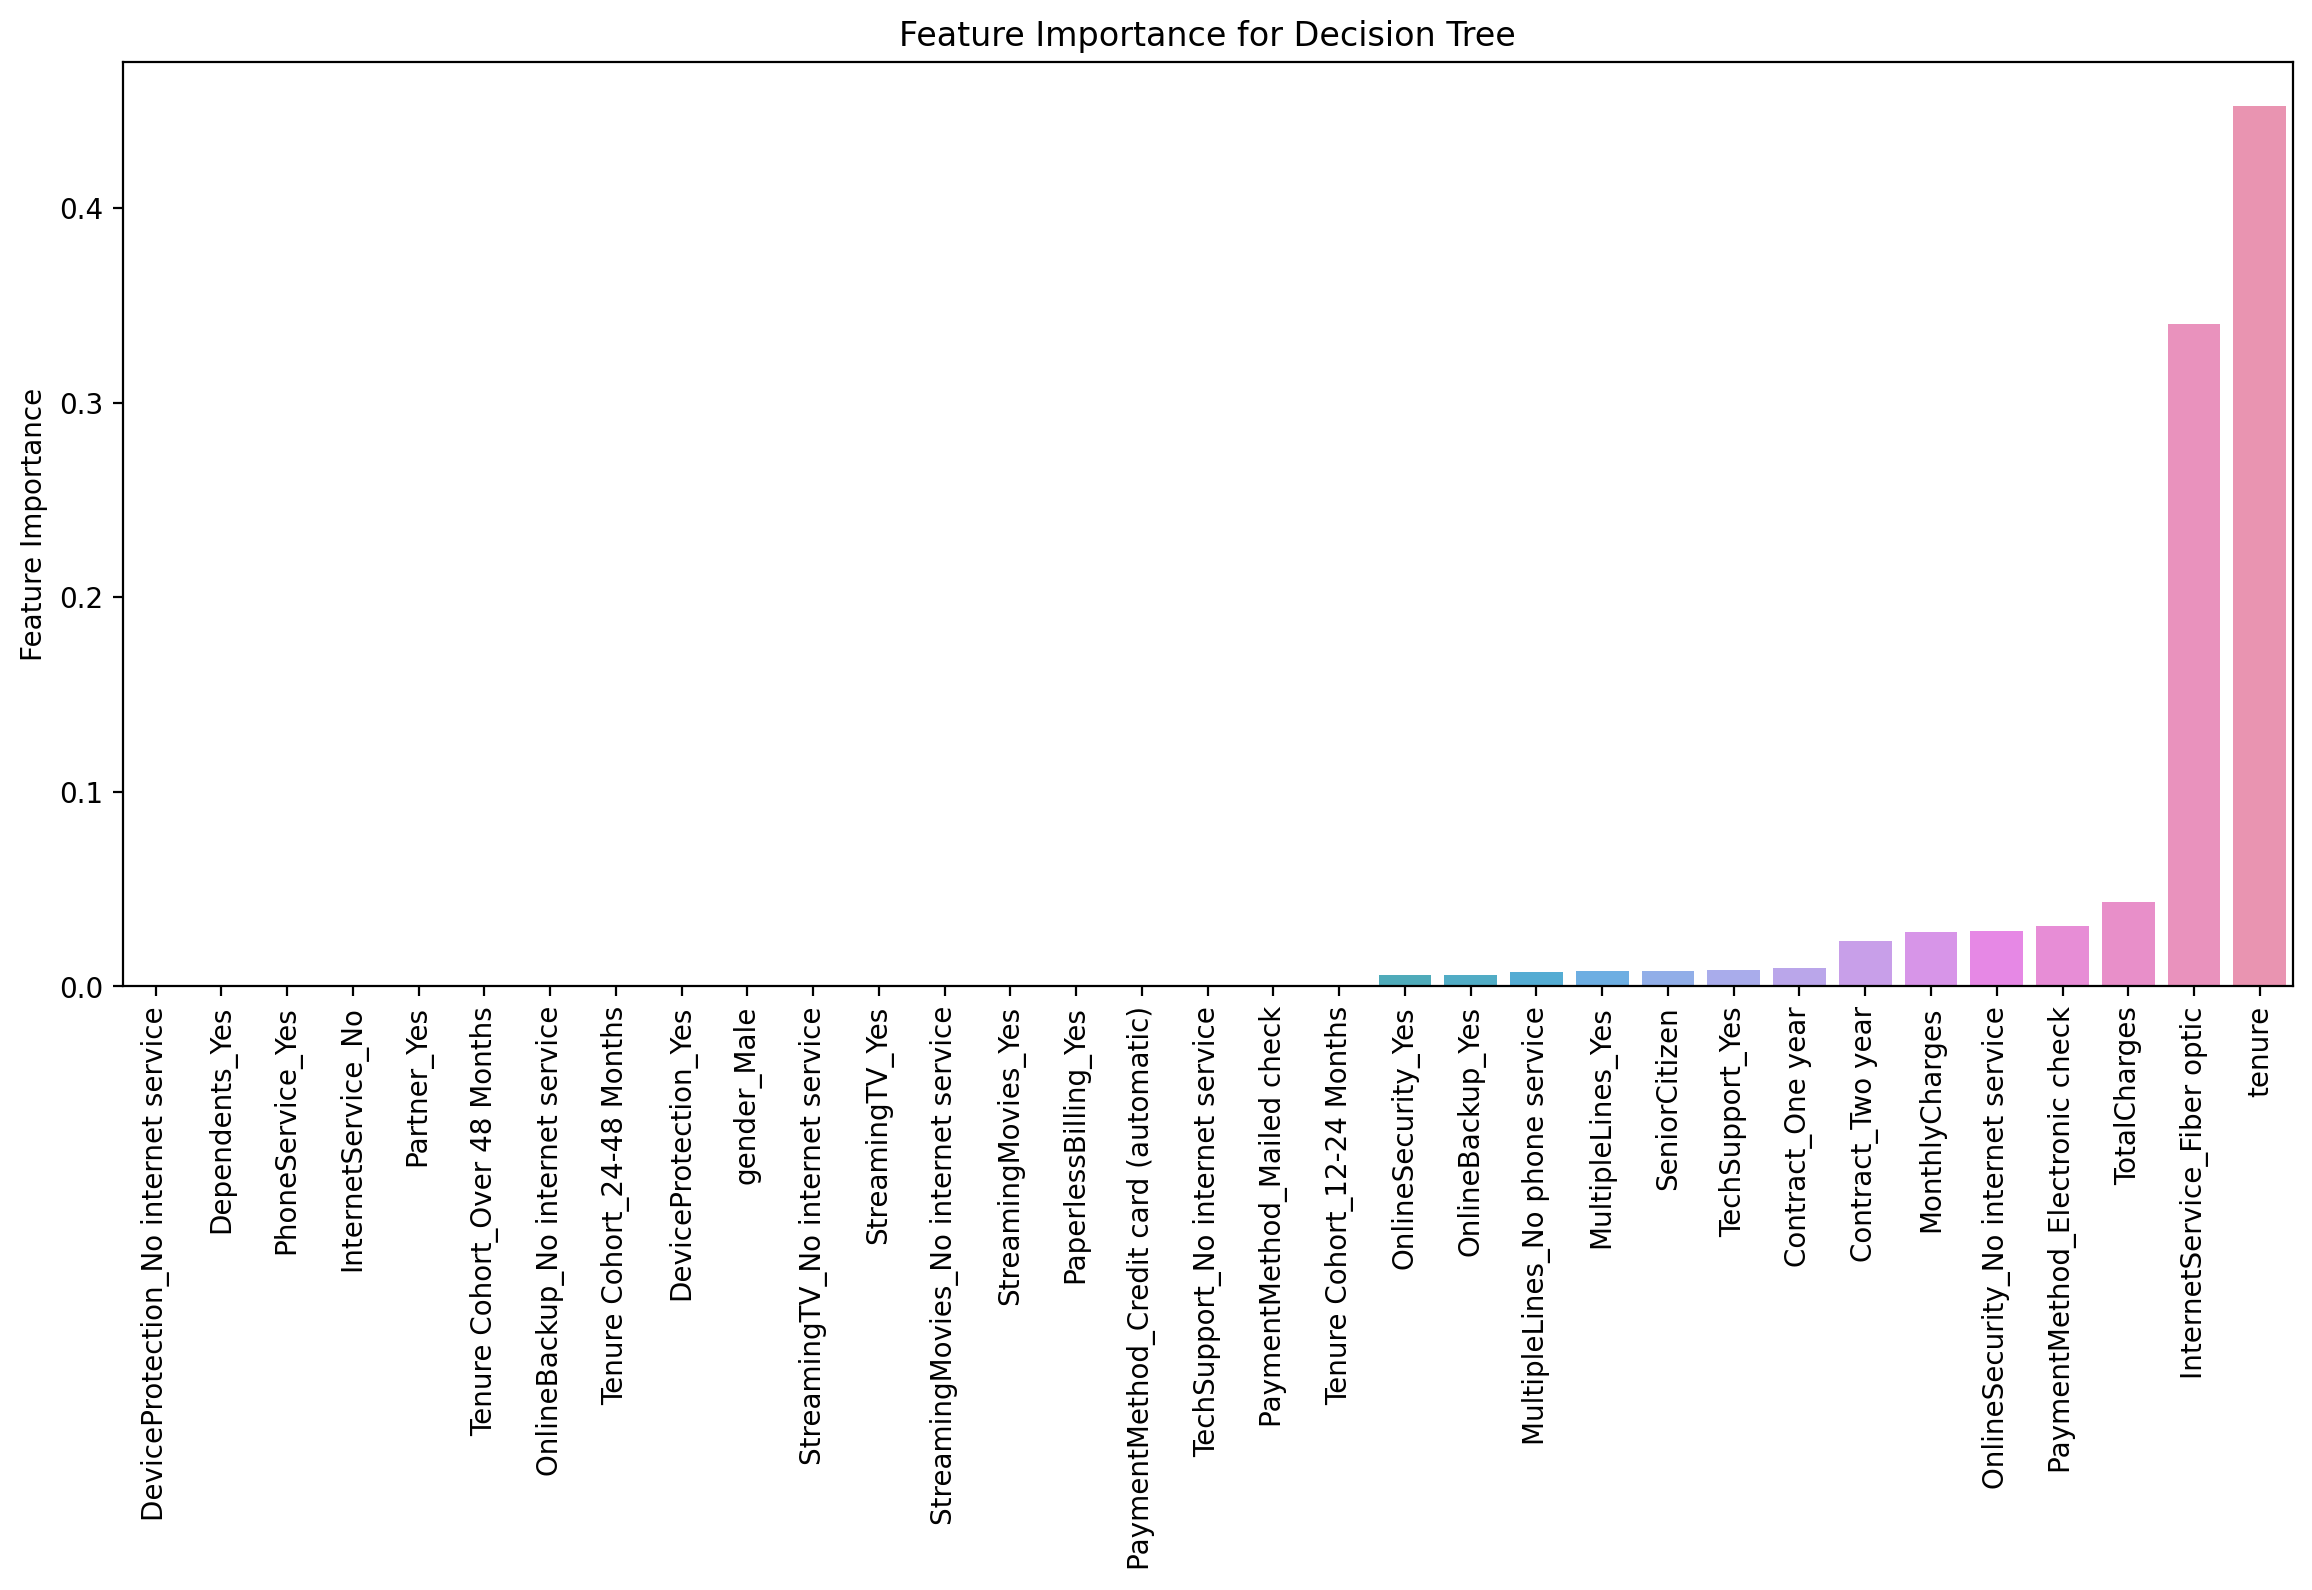

In [92]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

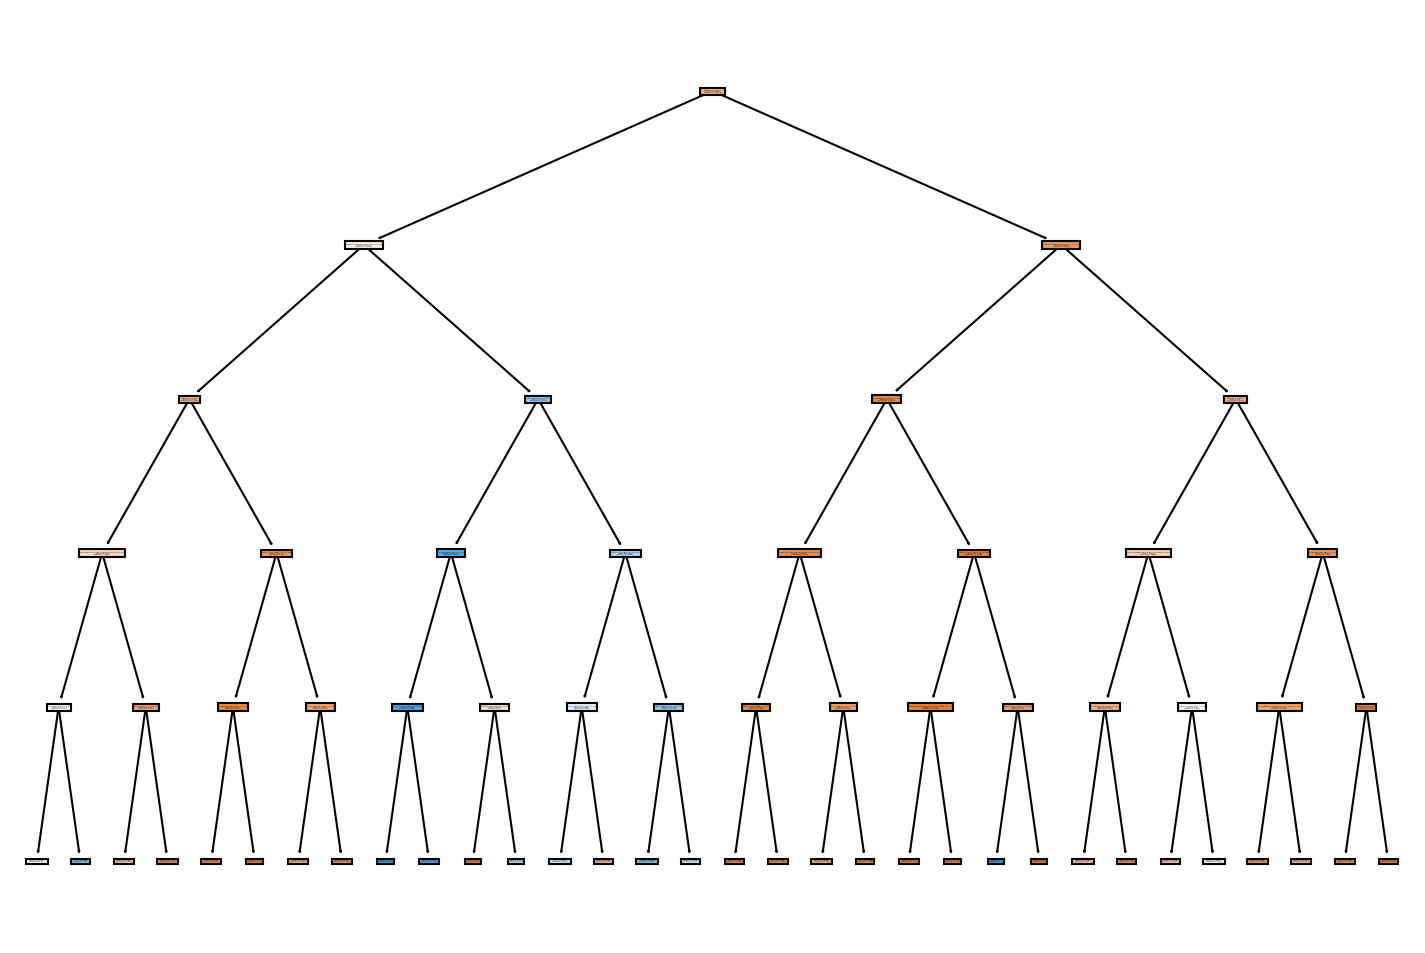

In [94]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

## Random Forest

**We create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set**

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.53      0.48      0.51       147

    accuracy                           0.80       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.80      0.80      0.80       704



C:\Users\nitin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


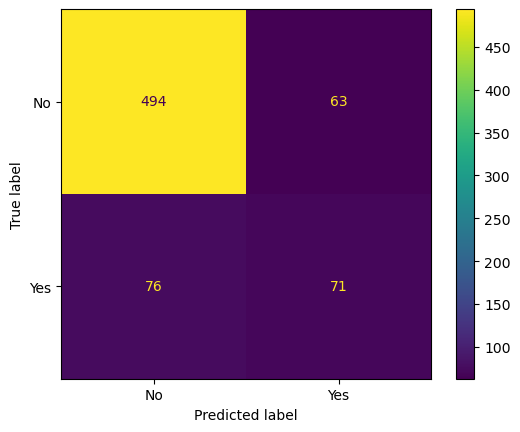

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=80)
rf.fit(X_train,y_train)
preds_rf=rf.predict(X_test)
print(classification_report(y_test, preds_rf))
plot_confusion_matrix(rf,X_test,y_test)

## Boosted Trees

**We use AdaBoost to create a model and get the classification report and plot a confusion matrix for its predicted results**

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



C:\Users\nitin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


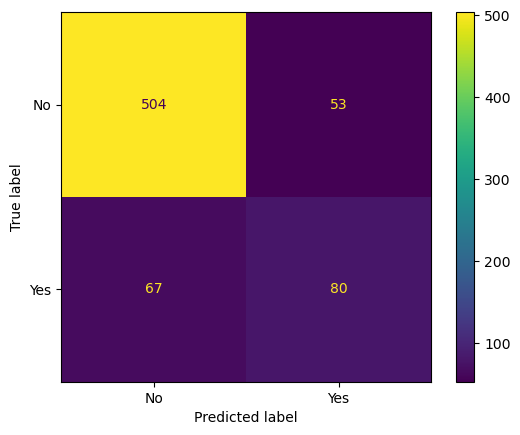

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
preds_ada = ada.predict(X_test)
print(classification_report(y_test,preds_ada))
plot_confusion_matrix(ada,X_test,y_test)

## Result
**On comparing the three models (A single descision tree, Random forests and Boosted Tree) we get the best f1-score of 89% and 51% and an accuracy of 83% using Adaptive Boosting**